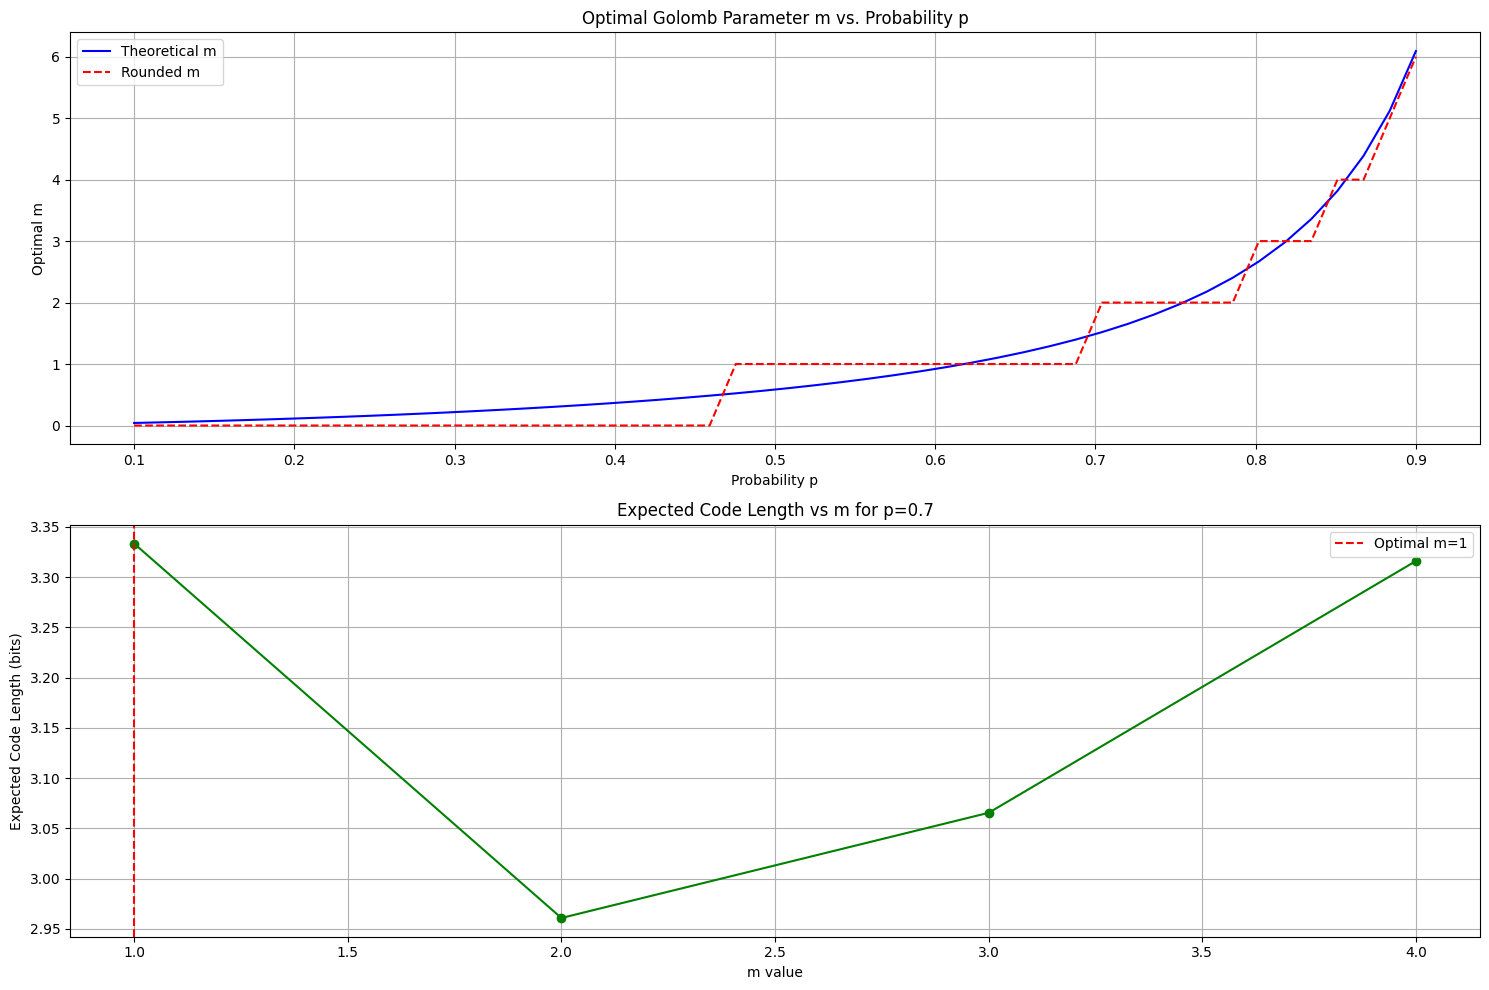


Detailed Analysis for p = 0.7:
Theoretical optimal m = 1.488
Rounded optimal m = 1

Expected code lengths for different m values:
m = 1: 3.333 bits
m = 2: 2.961 bits
m = 3: 3.065 bits
m = 4: 3.316 bits


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_optimal_m(p):
    """
    Calculate the optimal Golomb parameter m for a geometric distribution with parameter p.

    Parameters:
        p: probability parameter of geometric distribution (0 < p < 1)
    Returns:
        m: optimal Golomb parameter
    """
    return int(round(np.log2(1 + p) / np.log2(1/p)))

def expected_code_length(p, m, max_n=100):
    """
    Calculate expected code length for Golomb coding with parameter m
    under geometric distribution with parameter p.
    """
    lengths = []
    probabilities = []

    for n in range(max_n):
        # Calculate probability of n
        prob = (1-p) * (p**n)
        probabilities.append(prob)

        # Calculate code length for n
        q = n // m
        unary_length = q + 1  # q zeros plus one 1

        # Calculate truncated binary length for remainder
        c = int(np.ceil(np.log2(m)))
        remainder_length = c-1 if (n % m) < (2**c - m) else c

        lengths.append(unary_length + remainder_length)

    # Calculate expected length
    return np.sum(np.array(probabilities) * np.array(lengths))

def analyze_optimal_m():
    """
    Analyze and visualize the relationship between p and optimal m.
    """
    # Create range of p values
    p_values = np.linspace(0.1, 0.9, 50)
    optimal_m_values = []
    theoretical_m_values = []

    plt.figure(figsize=(15, 10))

    # Calculate optimal m values
    for p in p_values:
        theoretical_m = np.log2(1 + p) / np.log2(1/p)
        theoretical_m_values.append(theoretical_m)
        optimal_m_values.append(calculate_optimal_m(p))

    # Plot theoretical and rounded values
    plt.subplot(2, 1, 1)
    plt.plot(p_values, theoretical_m_values, 'b-', label='Theoretical m')
    plt.plot(p_values, optimal_m_values, 'r--', label='Rounded m')
    plt.grid(True)
    plt.xlabel('Probability p')
    plt.ylabel('Optimal m')
    plt.title('Optimal Golomb Parameter m vs. Probability p')
    plt.legend()

    # Demonstrate expected code length for different m values
    plt.subplot(2, 1, 2)
    p_example = 0.7
    optimal_m = calculate_optimal_m(p_example)
    m_range = range(max(1, optimal_m - 3), optimal_m + 4)
    expected_lengths = []

    for m in m_range:
        expected_lengths.append(expected_code_length(p_example, m))

    plt.plot(m_range, expected_lengths, 'go-')
    plt.axvline(x=optimal_m, color='r', linestyle='--',
                label=f'Optimal m={optimal_m}')
    plt.grid(True)
    plt.xlabel('m value')
    plt.ylabel('Expected Code Length (bits)')
    plt.title(f'Expected Code Length vs m for p={p_example}')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Print detailed analysis
    print(f"\nDetailed Analysis for p = {p_example}:")
    print(f"Theoretical optimal m = {np.log2(1 + p_example) / np.log2(1/p_example):.3f}")
    print(f"Rounded optimal m = {optimal_m}")
    print("\nExpected code lengths for different m values:")
    for m, length in zip(m_range, expected_lengths):
        print(f"m = {m}: {length:.3f} bits")

    return optimal_m_values, theoretical_m_values

# Run the analysis
optimal_m_values, theoretical_m_values = analyze_optimal_m()